<a href="https://colab.research.google.com/github/natkins14/Disease-Analytics/blob/main/Disease_Analytics_Project_Nathaniel_Atkins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Step 2: Get the data


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import TextVectorization, Normalization, Rescaling

print(tf.__version__)

2.17.1


In [ ]:
url = 'http://drnam.org/pythonfiles/LifeExpectancy.csv'

raw_dataset = pd.read_csv(url)
raw_dataset.columns = ['Country','Year','Status','Life Expectancy','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure','Diphtheria','HIV/AIDS','GDP','Population','Thinness 1-19 years','Thinness 5-9 years','Income composition of resources','Schooling']
dataset = raw_dataset.copy()
dataset.tail()


Country  Year      Status  Life Expectancy  Adult Mortality  \
2933  Zimbabwe  2004  Developing             44.3            723.0   
2934  Zimbabwe  2003  Developing             44.5            715.0   
2935  Zimbabwe  2002  Developing             44.8             73.0   
2936  Zimbabwe  2001  Developing             45.3            686.0   
2937  Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
2933             27     4.36                     0.0         68.0       31   
2934             26     4.06                     0.0          7.0      998   
2935             25     4.43                     0.0         73.0      304   
2936             25     1.72                     0.0         76.0      529   
2937             24     1.68                     0.0         79.0     1483   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  Thinness 1-19 years  Thinness 5-9 years  \
2933  12777511.0                  9.4                 9.4   
2934  12633897.0                  9.8                 9.9   
2935    125525.0                  1.2                 1.3   
2936  12366165.0                  1.6                 1.7   
2937  12222251.0                 11.0                11.2   

      Income composition of resources  Schooling  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[5 rows x 22 columns]

Step 3: Clean the data

In [ ]:
dataset.isna().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset = dataset.drop(['Country'], axis=1)
dataset = dataset.drop(['Year'], axis=1)
dataset = dataset.drop(['Status'], axis=1)
dataset.tail()

Life Expectancy  Adult Mortality  infant deaths  Alcohol  \
2933             44.3            723.0             27     4.36   
2934             44.5            715.0             26     4.06   
2935             44.8             73.0             25     4.43   
2936             45.3            686.0             25     1.72   
2937             46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
2933                     0.0         68.0       31  27.1                 42   
2934                     0.0          7.0      998  26.7                 41   
2935                     0.0         73.0      304  26.3                 40   
2936                     0.0         76.0      529  25.9                 39   
2937                     0.0         79.0     1483  25.5                 39   

      Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
2933   67.0               7.13        65.0      33.6  454.366654  12777511.0   
2934    7.0               6.52        68.0      36.7  453.351155  12633897.0   
2935   73.0               6.53        71.0      39.8   57.348340    125525.0   
2936   76.0               6.16        75.0      42.1  548.587312  12366165.0   
2937   78.0               7.10        78.0      43.5  547.358878  12222251.0   

      Thinness 1-19 years  Thinness 5-9 years  \
2933                  9.4                 9.4   
2934                  9.8                 9.9   
2935                  1.2                 1.3   
2936                  1.6                 1.7   
2937                 11.0                11.2   

      Income composition of resources  Schooling  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8

Step 4: Split the data into the train and test

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_dataset.tail()
len(train_dataset)

1319

In [ ]:
test_dataset.tail()
#len(test_dataset)

Life Expectancy  Adult Mortality  infant deaths  Alcohol  \
2855             69.3            176.0              0     1.24   
2907             61.1            314.0             28     0.01   
2912             57.4            368.0             30     2.30   
2923             59.2            371.0             23     6.50   
2933             44.3            723.0             27     4.36   

      percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
2855              171.137361         66.0      101  42.6                  0   
2907              196.667577         86.0        9  22.8                 41   
2912              143.869887         94.0       26   2.2                 47   
2923               10.822595         91.0        0  31.3                 34   
2933                0.000000         68.0       31  27.1                 42   

      Polio  Total expenditure  Diphtheria  HIV/AIDS          GDP  Population  \
2855   67.0               3.52         7.0       0.1  1353.934819    193956.0   
2907   78.0               4.99        86.0       4.3  1738.882200   1562974.0   
2912   93.0               4.73        94.0       9.1  1139.112330  13456417.0   
2923   92.0               6.44        91.0       6.3   127.474620  15411675.0   
2933   67.0               7.13        65.0      33.6   454.366654  12777511.0   

      Thinness 1-19 years  Thinness 5-9 years  \
2855                  1.7                 1.6   
2907                  6.3                 6.2   
2912                  6.7                 6.6   
2923                  5.9                 5.7   
2933                  9.4                 9.4   

      Income composition of resources  Schooling  
2855                            0.000       10.2  
2907                            0.570       12.5  
2912                            0.518       11.6  
2923                            0.498       10.3  
2933                            0.407        9.2

Step 5: Inspect the data

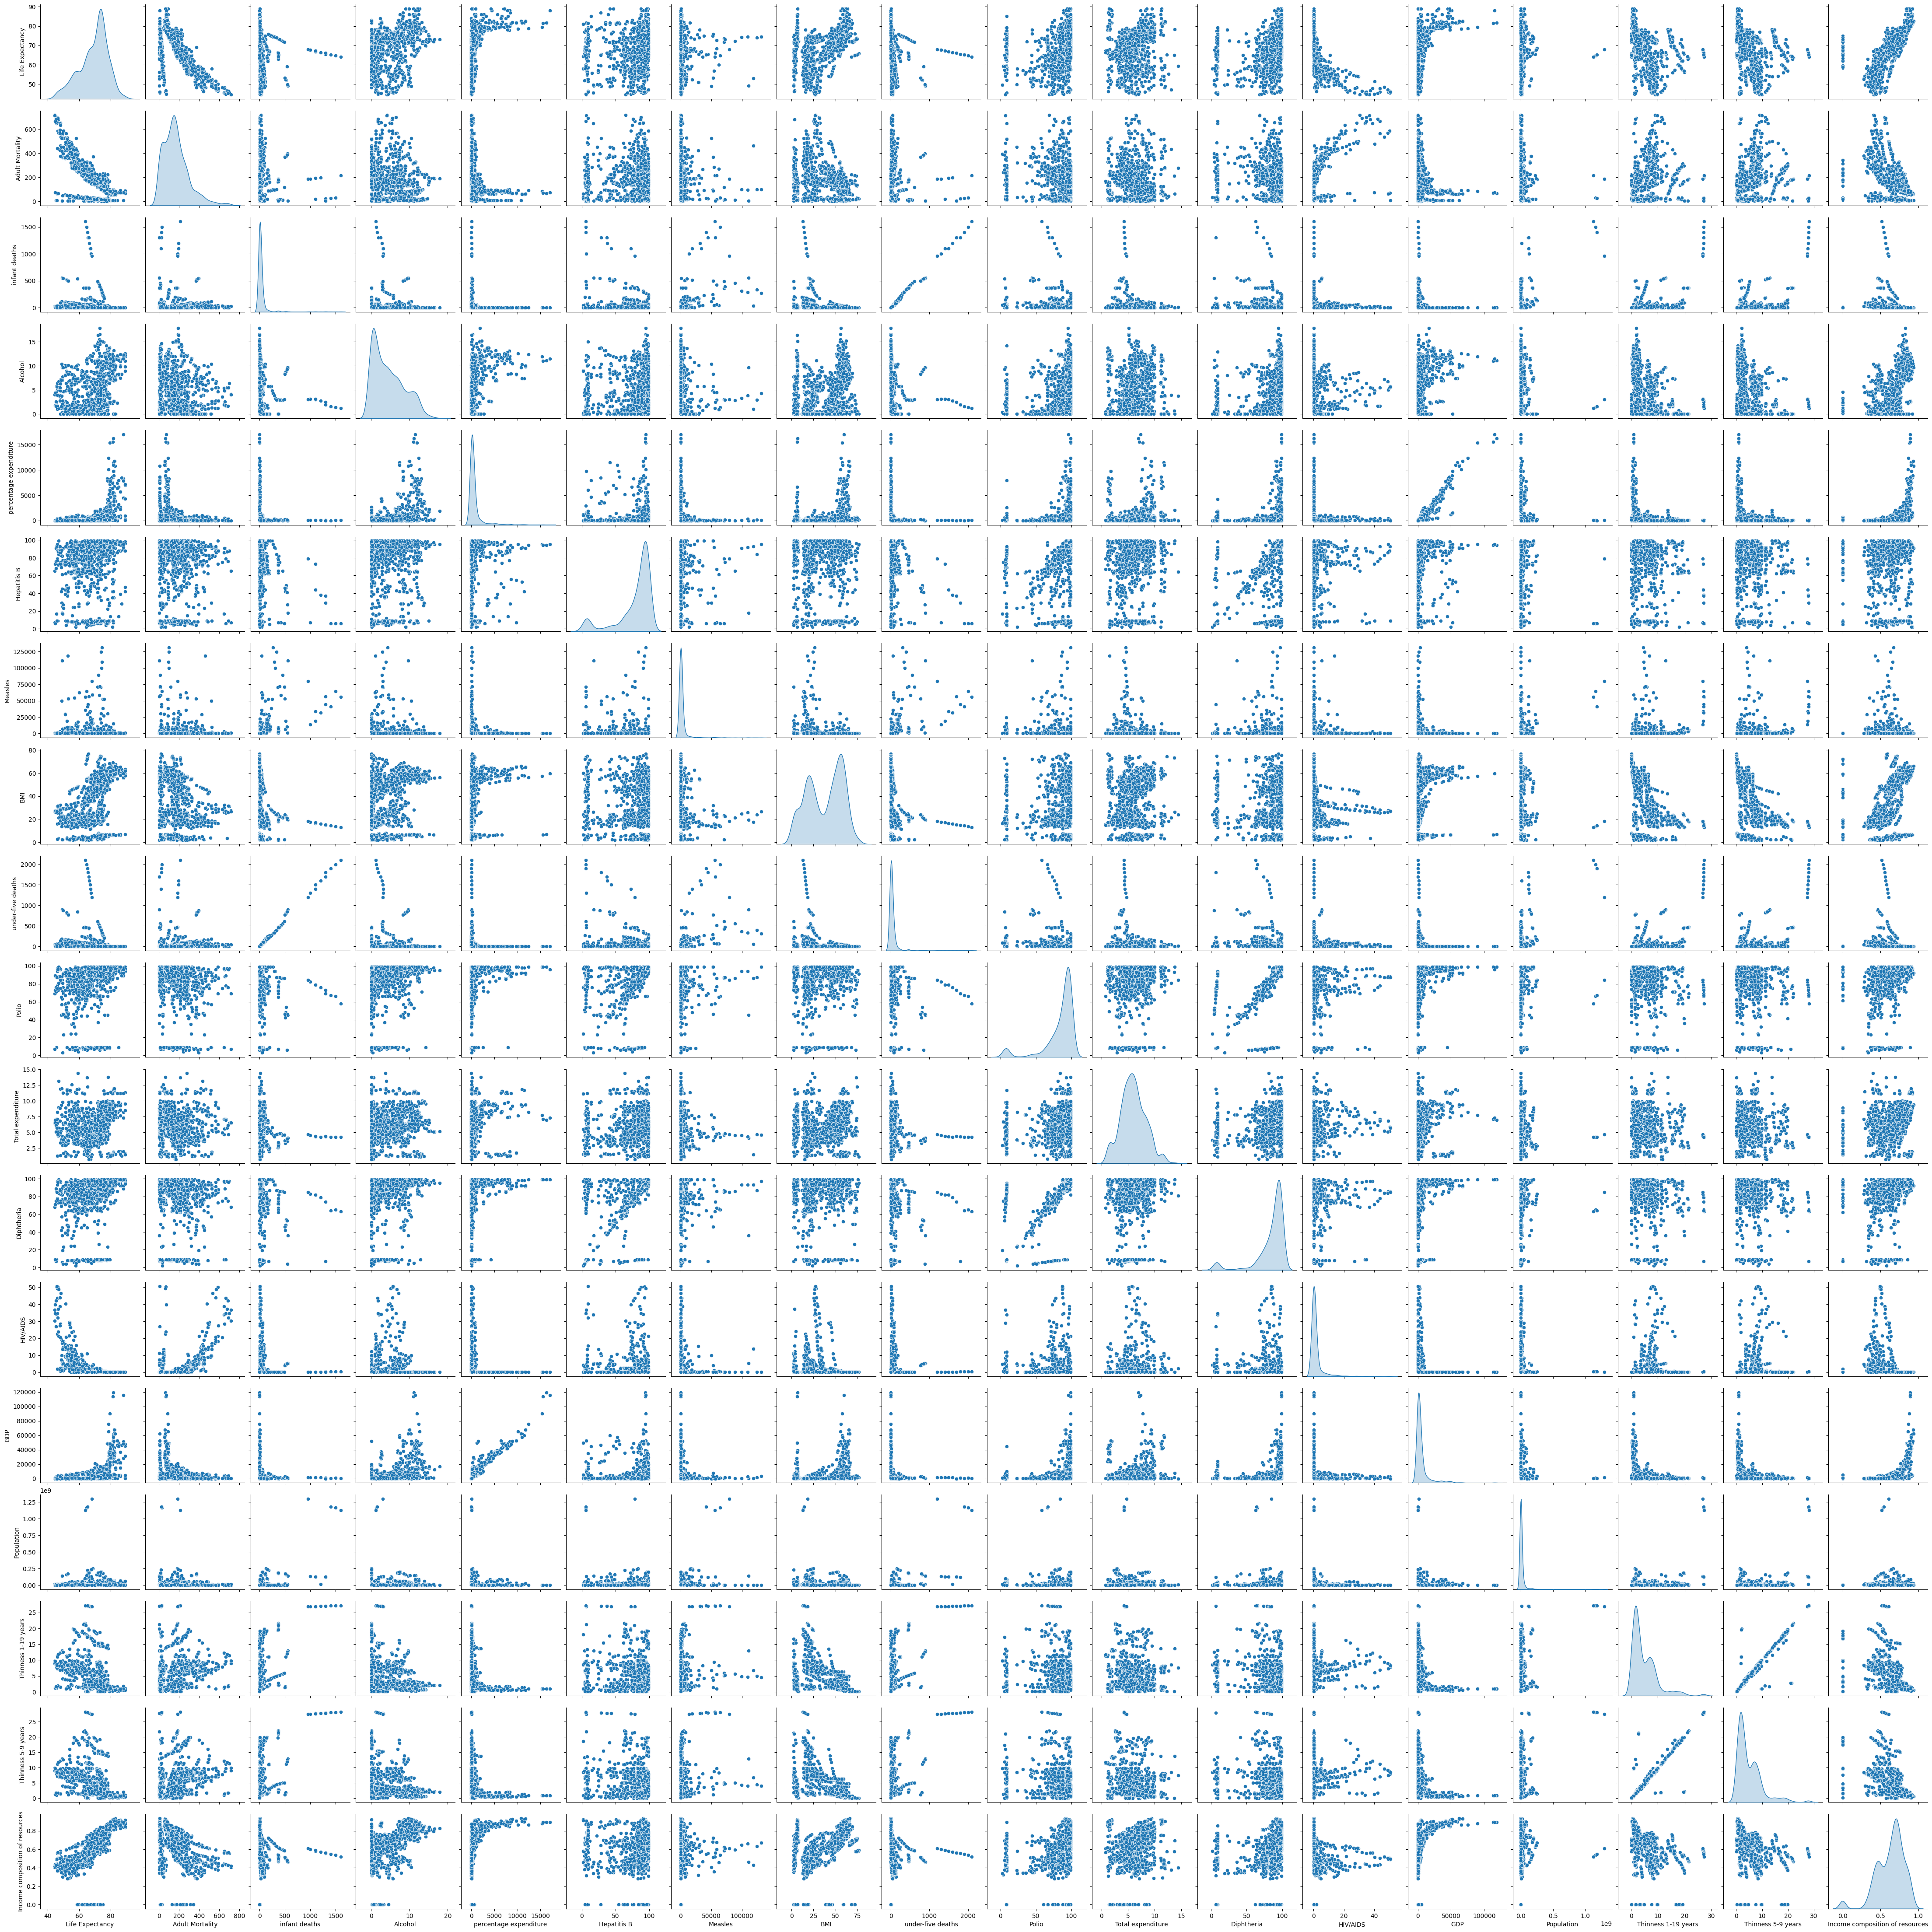

In [ ]:
sns.pairplot(train_dataset[['Life Expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years', 'Thinness 5-9 years', 'Income composition of resources']] , diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

count          mean           std       min  \
Life Expectancy                  1319.0  6.918514e+01  8.902624e+00  44.50000   
Adult Mortality                  1319.0  1.698514e+02  1.276983e+02   1.00000   
infant deaths                    1319.0  3.454814e+01  1.256106e+02   0.00000   
Alcohol                          1319.0  4.525959e+00  4.016759e+00   0.01000   
percentage expenditure           1319.0  7.231894e+02  1.797958e+03   0.00000   
Hepatitis B                      1319.0  7.911221e+01  2.580167e+01   2.00000   
Measles                          1319.0  2.506603e+03  1.107832e+04   0.00000   
BMI                              1319.0  3.785042e+01  1.976842e+01   2.10000   
under-five deaths                1319.0  4.661334e+01  1.682738e+02   0.00000   
Polio                            1319.0  8.386353e+01  2.192786e+01   3.00000   
Total expenditure                1319.0  5.969727e+00  2.315975e+00   0.74000   
Diphtheria                       1319.0  8.449583e+01  2.099548e+01   2.00000   
HIV/AIDS                         1319.0  2.068309e+00  6.184773e+00   0.10000   
GDP                              1319.0  5.725717e+03  1.175473e+04   1.68135   
Population                       1319.0  1.502157e+07  7.137109e+07  34.00000   
Thinness 1-19 years              1319.0  4.828810e+00  4.620196e+00   0.10000   
Thinness 5-9 years               1319.0  4.929113e+00  4.718763e+00   0.10000   
Income composition of resources  1319.0  6.324905e-01  1.792870e-01   0.00000   
Schooling                        1319.0  1.210303e+01  2.787533e+00   4.40000   

                                           25%           50%           75%  \
Life Expectancy                      64.100000  7.170000e+01  7.500000e+01   
Adult Mortality                      78.000000  1.490000e+02  2.280000e+02   
infant deaths                         1.000000  3.000000e+00  2.300000e+01   
Alcohol                               0.860000  3.730000e+00  7.330000e+00   
percentage expenditure               39.153841  1.496599e+02  5.199601e+02   
Hepatitis B                          74.000000  8.900000e+01  9.600000e+01   
Measles                               0.000000  1.500000e+01  3.945000e+02   
BMI                                  19.500000  4.320000e+01  5.570000e+01   
under-five deaths                     1.000000  4.000000e+00  3.200000e+01   
Polio                                81.000000  9.300000e+01  9.700000e+01   
Total expenditure                     4.425000  5.830000e+00  7.445000e+00   
Diphtheria                           81.000000  9.300000e+01  9.700000e+01   
HIV/AIDS                              0.100000  1.000000e-01  7.000000e-01   
GDP                                 485.514012  1.631417e+03  4.783054e+03   
Population                       190545.500000  1.396748e+06  7.482690e+06   
Thinness 1-19 years                   1.600000  3.000000e+00  7.000000e+00   
Thinness 5-9 years                    1.600000  3.200000e+00  7.100000e+00   
Income composition of resources       0.509000  6.720000e-01  7.500000e-01   
Schooling                            10.400000  1.230000e+01  1.390000e+01   

                                          max  
Life Expectancy                  8.900000e+01  
Adult Mortality                  7.170000e+02  
infant deaths                    1.600000e+03  
Alcohol                          1.787000e+01  
percentage expenditure           1.702853e+04  
Hepatitis B                      9.900000e+01  
Measles                          1.314410e+05  
BMI                              7.670000e+01  
under-five deaths                2.100000e+03  
Polio                            9.900000e+01  
Total expenditure                1.439000e+01  
Diphtheria                       9.900000e+01  
HIV/AIDS                         5.060000e+01  
GDP                              1.191727e+05  
Population                       1.293859e+09  
Thinness 1-19 years              2.720000e+01  
Thinness 5-9 years               2.8

Step 6: Split features from labels

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Life Expectancy')
test_labels = test_features.pop('Life Expectancy')
train_labels.tail()

2229    63.4
2257    62.1
823     72.0
1388    64.9
427     52.6
Name: Life Expectancy, dtype: float64

Step 7: Create a normalization layer

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

mean           std
Life Expectancy                  6.918514e+01  8.902624e+00
Adult Mortality                  1.698514e+02  1.276983e+02
infant deaths                    3.454814e+01  1.256106e+02
Alcohol                          4.525959e+00  4.016759e+00
percentage expenditure           7.231894e+02  1.797958e+03
Hepatitis B                      7.911221e+01  2.580167e+01
Measles                          2.506603e+03  1.107832e+04
BMI                              3.785042e+01  1.976842e+01
under-five deaths                4.661334e+01  1.682738e+02
Polio                            8.386353e+01  2.192786e+01
Total expenditure                5.969727e+00  2.315975e+00
Diphtheria                       8.449583e+01  2.099548e+01
HIV/AIDS                         2.068309e+00  6.184773e+00
GDP                              5.725717e+03  1.175473e+04
Population                       1.502157e+07  7.137109e+07
Thinness 1-19 years              4.828810e+00  4.620196e+00
Thinness 5-9 years               4.929113e+00  4.718763e+00
Income composition of resources  6.324905e-01  1.792870e-01
Schooling                        1.210303e+01  2.787533e+00

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
numerical_features = train_features.select_dtypes(include=np.number)

In [ ]:
normalizer.adapt(np.array(numerical_features))

In [ ]:
print(normalizer.mean.numpy())

[[1.6985141e+02 3.4548141e+01 4.5259590e+00 7.2318939e+02 7.9112206e+01
  2.5066035e+03 3.7850418e+01 4.6613342e+01 8.3863533e+01 5.9697270e+00
  8.4495827e+01 2.0683093e+00 5.7257168e+03 1.5021572e+07 4.8288097e+00
  4.9291129e+00 6.3249052e-01 1.2103033e+01]]


Step 8: Linear Regression with **One Input**

In [ ]:
measles = np.array(train_features['Measles'])

measles_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
measles_normalizer.adapt(measles)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
measles_model = tf.keras.Sequential([
    measles_normalizer,
    keras.layers.Dense(units=1)
])

measles_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
measles_model.predict(measles[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


array([[ 0.13552266],
       [-0.67271376],
       [ 0.13552266],
       [ 0.13552266],
       [ 0.13065669],
       [ 0.08594391],
       [-0.37248382],
       [-1.455593  ],
       [ 0.13546859],
       [ 0.13546859]], dtype=float32)

In [ ]:
measles_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = measles_model.fit(
    train_features['Measles'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 11.1 s, sys: 538 ms, total: 11.6 s
Wall time: 14.8 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  val_loss  epoch
95  6.989411  6.935218     95
96  6.991869  6.948070     96
97  6.999418  6.934115     97
98  6.994059  6.924122     98
99  6.988240  6.930678     99

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Life Expectancy]')
  plt.legend()
  plt.grid(True)

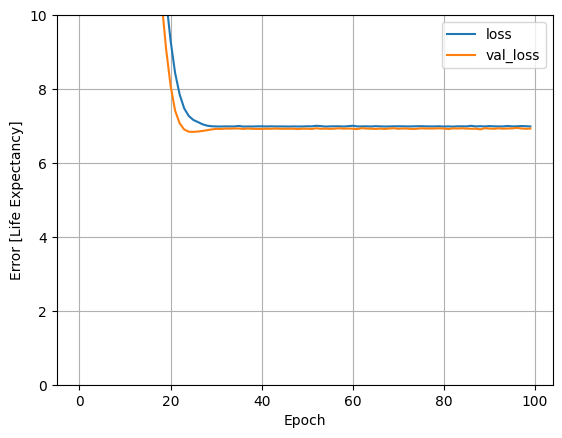

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['measles_model'] = measles_model.evaluate(
    test_features['Measles'],
    test_labels, verbose=0)

In [ ]:
x=tf.linspace(0.0, 120000, 250)
y=measles_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
def plot_measles(x, y):
  plt.scatter(train_features['Measles'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Measles')
  plt.ylabel('Life Expectancy')
  plt.legend

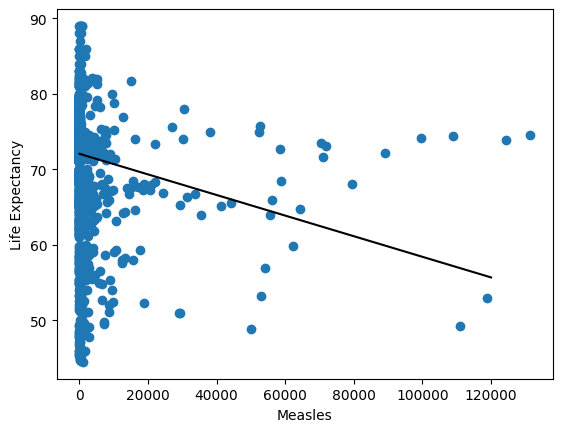

In [ ]:
plot_measles(x, y)

Analysis: The greater amount of people with measles, the lower the life expectancy. The maximum life expectancy is 75 years. The lower the amount of people with measles, the greater the life expectancy. The maximum life expectancy for small amounts of people with measles is near 90 years.

**Linear Regression with Multiple Inputs**

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    keras.layers.Dense(units=1)
])

In [ ]:
linear_model.predict(numerical_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


array([[ 0.15468848],
       [ 0.9386932 ],
       [ 0.8163035 ],
       [-0.26521146],
       [-1.3378984 ],
       [ 3.8627486 ],
       [-0.9965209 ],
       [-1.662203  ],
       [-2.011474  ],
       [ 1.2801846 ]], dtype=float32)

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)


CPU times: user 11.7 s, sys: 634 ms, total: 12.3 s
Wall time: 16.2 s


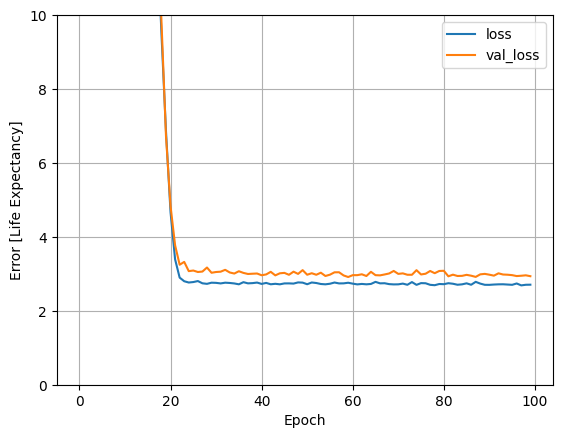

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

Step 9: A DNN Regression - **One Variable**

In [ ]:
from tensorflow.keras import layers

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_measles_model = build_and_compile_model(measles_normalizer)

In [ ]:
dnn_measles_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [ ]:
%%time
history = dnn_measles_model.fit(
    train_features['Measles'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 13.8 s, sys: 588 ms, total: 14.4 s
Wall time: 16.7 s


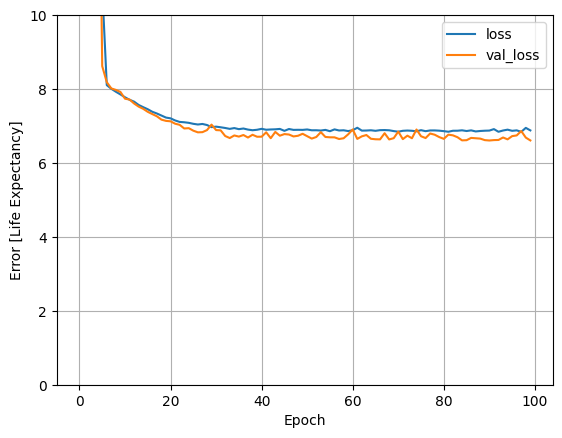

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 80000, 50)
y = dnn_measles_model.predict(x)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [ ]:
plot_measles(x, y)

In [ ]:
test_results['dnn_measles_model'] = dnn_measles_model.evaluate(
    test_features['Measles'], test_labels,
    verbose=0)

**Full Model**

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (10, 18)                    │              37 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37 (152.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 37 (152.00 B)

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 15.9 s, sys: 676 ms, total: 16.6 s
Wall time: 24.4 s


In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

**Performance**

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Life Expectancy]']).T

Mean absolute error [Life Expectancy]
measles_model                                   6.261413
linear_model                                    3.085459
dnn_measles_model                               6.220277
dnn_model                                       2.235444
reloaded                                        2.235444

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(test_labels, dnn_model.predict(test_features))
print('R Squared:', r2)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R Squared: 0.8485465444449134


**Step 10: Make Predictions**

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Life Expectancy]')
plt.ylabel('Predictions [Life Expectancy]')
lims = [30, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Analysis: The model predicts true values of life expectancy reasonably well. As from the graph, the regression line is approximately linear and fits the predicted life expectancy ver well.

**Error Distribution**

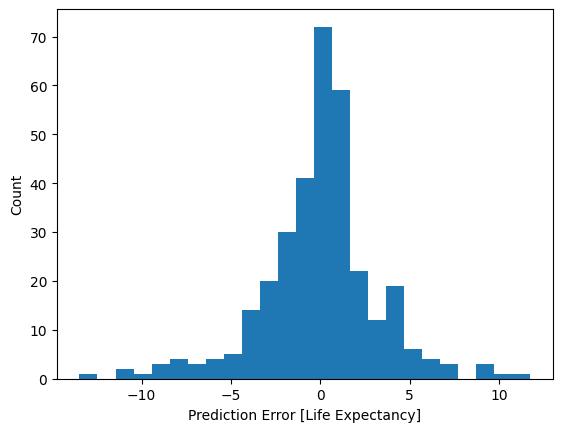

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Life Expectancy]')
_ = plt.ylabel('Count')

Analysis: The prediction error is a bell shaped curve. This figure displays that the predicted life expectancy values are within +/- 5% of the true values. For the data that did not have a prediction error less than 5%, the predicted life expectancy data is usually lower than the true life expectancy data. This implies that a predicted life expectancy value is less than the true life expectancy value. For our model, the greater the data count, the lower the prediction error between predicted life expectancy and true life expectancy.

In [ ]:
dnn_model.save('dnn_model.keras')

**Reloaded Model**

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model.keras')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Life Expectancy]']).T

Mean absolute error [Life Expectancy]
measles_model                                   6.261413
linear_model                                    3.085459
dnn_measles_model                               6.220277
dnn_model                                       2.235444
reloaded                                        2.235444